# Proximity analysis
In this notebook we will be working with data from [OpenStreetMap](https://openstreetmap.org) to do proximity analysis to various urban amenities.

In [163]:
import geopandas
import pyproj
from shapely.ops import transform

%matplotlib inline

## Import data

In [72]:
food_sources_file = "data/Tampere-food_sources.geojson"
bus_stops_file = "data/Tampere-bus_stops.gpkg"
building_footprints_file = "data/Tampere-buildings.gpkg"

In [73]:
food_sources = geopandas.read_file(food_sources_file)
bus_stops = geopandas.read_file(bus_stops_file)
buildings = geopandas.read_file(building_footprints_file)

In [74]:
food_sources.shape

(55, 6)

In [75]:
bus_stops.shape

(737, 5)

In [76]:
buildings.shape

(16433, 6)

## Use OSM for GeoDataFrame index

In [77]:
buildings.set_index("osm_id", inplace=True, verify_integrity=True)
bus_stops.set_index("osm_id", inplace=True, verify_integrity=True)
food_sources.set_index("osm_id", inplace=True, verify_integrity=True)

## Building centroids

In [128]:
buildings["centroid"] = buildings["geometry"].centroid

In [129]:
buildings.head()

,code,fclass,name,type,geometry,within_food_catchment,color,access_to_ammenities,centroid
osm_id,,,,,,,,,
4881423,1500,building,Tesoman liikekeskus,retail,"MULTIPOLYGON (((2630165.146 8743043.051, 26302...",True,blue,True,POINT (2630225.788 8742972.055)
4881551,1500,building,K-Market Winterinmutka,retail,"MULTIPOLYGON (((2634712.146 8743523.360, 26347...",False,red,False,POINT (2634757.358 8743507.709)
4983894,1500,building,None,None,"MULTIPOLYGON (((2637171.795 8743326.127, 26371...",True,blue,True,POINT (2637191.237 8743327.620)
4983896,1500,building,None,None,"MULTIPOLYGON (((2637238.575 8743314.366, 26372...",False,red,False,POINT (2637257.370 8743316.543)
4983916,1500,building,None,None,"MULTIPOLYGON (((2636996.066 8743546.463, 26370...",True,blue,True,POINT (2637019.994 8743543.104)


In [130]:
buildings.rename(
    columns={
        "geometry": "footprint",
        "centroid": "geometry"
    }, 
    inplace=True
)

In [131]:
buildings.head()

,code,fclass,name,type,footprint,within_food_catchment,color,access_to_ammenities,geometry
osm_id,,,,,,,,,
4881423,1500,building,Tesoman liikekeskus,retail,"MULTIPOLYGON (((2630165.146 8743043.051, 26302...",True,blue,True,POINT (2630225.788 8742972.055)
4881551,1500,building,K-Market Winterinmutka,retail,"MULTIPOLYGON (((2634712.146 8743523.360, 26347...",False,red,False,POINT (2634757.358 8743507.709)
4983894,1500,building,None,None,"MULTIPOLYGON (((2637171.795 8743326.127, 26371...",True,blue,True,POINT (2637191.237 8743327.620)
4983896,1500,building,None,None,"MULTIPOLYGON (((2637238.575 8743314.366, 26372...",False,red,False,POINT (2637257.370 8743316.543)
4983916,1500,building,None,None,"MULTIPOLYGON (((2636996.066 8743546.463, 26370...",True,blue,True,POINT (2637019.994 8743543.104)


In [132]:
buildings.dtypes

code                        int64
fclass                     object
name                       object
type                       object
footprint                geometry
within_food_catchment        bool
color                      object
access_to_ammenities         bool
geometry                 geometry
dtype: object

## Create buffers

### Food sources

In [78]:
buffer_distance_m = 1000

food_sources_buffered = food_sources.buffer(buffer_distance_m)

type(food_sources_buffered)

geopandas.geoseries.GeoSeries

### Bus stopsone_km = 1000

food_sources_buffered = food_sources.buffer(one_km)

In [144]:
%%time
buffer_distance_m = 250

bus_stops_buffered = bus_stops.buffer(buffer_distance_m)

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 196 ms


## Dissolve buffers

### Food sources

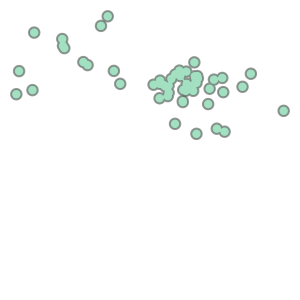

In [145]:
food_sources_catchment = food_sources_buffered.unary_union
food_sources_catchment

### Bus stops

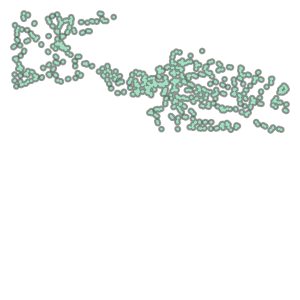

In [146]:
bus_stops_catchment = bus_stops_buffered.unary_union
bus_stops_catchment

## Access to ammenities

CPU times: user 52.1 ms, sys: 252 µs, total: 52.3 ms
Wall time: 68.3 ms


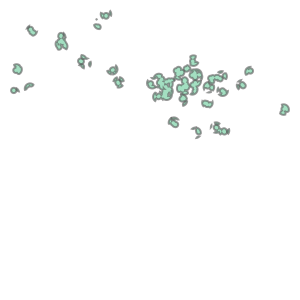

In [147]:
%%time
access_to_ammenities = bus_stops_catchment.intersection(food_sources_catchment)
access_to_ammenities

## Buildings within food catchment

In [148]:
%%time
buildings["within_food_catchment"] = buildings.within(food_sources_catchment)

CPU times: user 14.8 s, sys: 184 ms, total: 15 s
Wall time: 15 s


In [149]:
%%time
buildings["access_to_ammenities"] = buildings.within(access_to_ammenities)

CPU times: user 42.9 s, sys: 731 ms, total: 43.6 s
Wall time: 43.8 s


In [125]:
buildings.head()

,code,fclass,name,type,geometry,within_food_catchment,color,access_to_ammenities
osm_id,,,,,,,,
4881423,1500,building,Tesoman liikekeskus,retail,"MULTIPOLYGON (((2630165.146 8743043.051, 26302...",True,blue,True
4881551,1500,building,K-Market Winterinmutka,retail,"MULTIPOLYGON (((2634712.146 8743523.360, 26347...",False,red,False
4983894,1500,building,None,None,"MULTIPOLYGON (((2637171.795 8743326.127, 26371...",True,blue,True
4983896,1500,building,None,None,"MULTIPOLYGON (((2637238.575 8743314.366, 26372...",False,red,False
4983916,1500,building,None,None,"MULTIPOLYGON (((2636996.066 8743546.463, 26370...",True,blue,True


<AxesSubplot:>

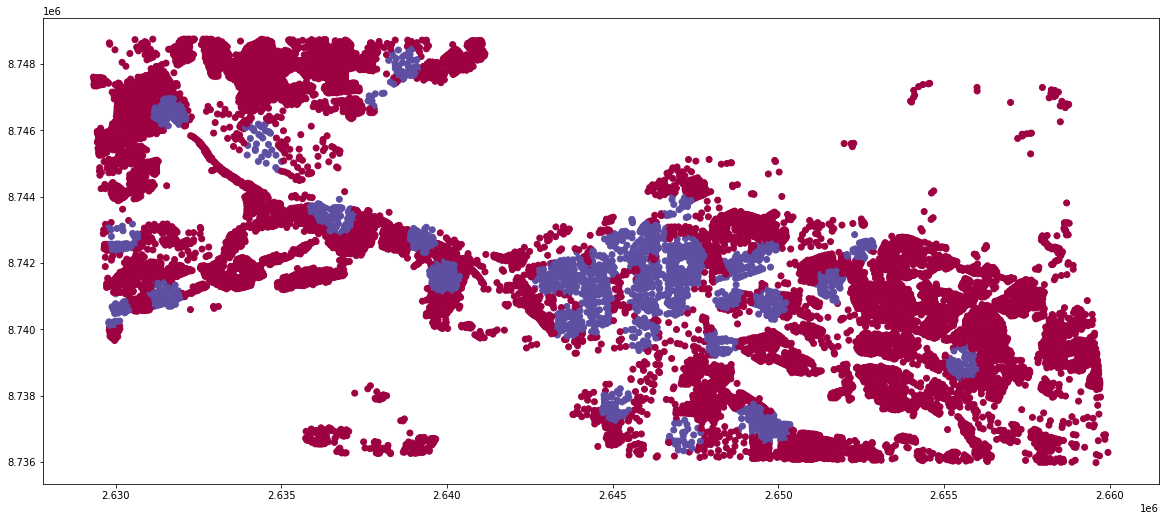

In [150]:
buildings.plot(categorical=True, column="within_food_catchment",figsize=(20, 15), cmap='Spectral')

<AxesSubplot:>

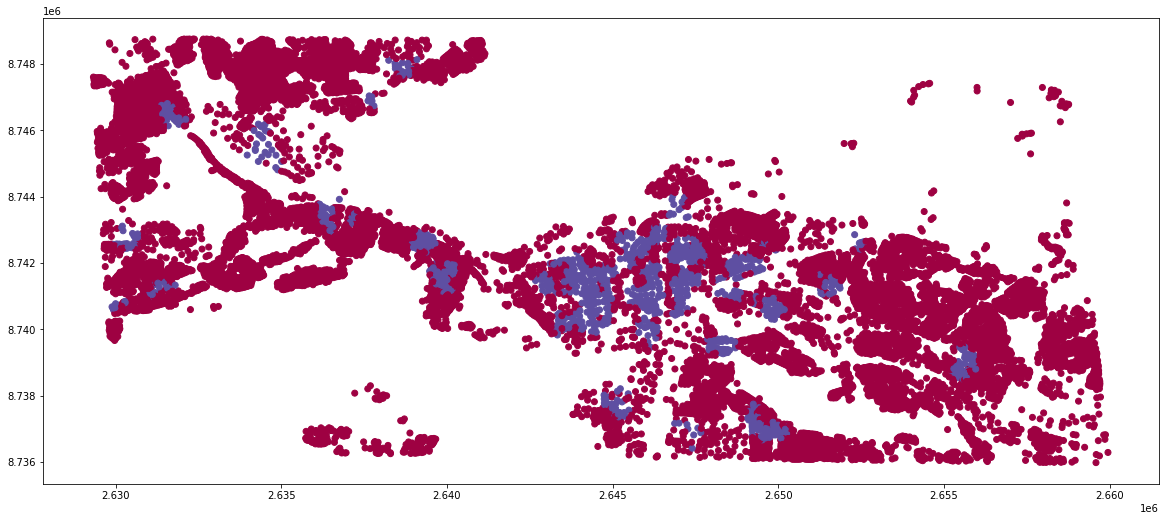

In [151]:
buildings.plot(categorical=True, column="access_to_ammenities",figsize=(20, 15), cmap='Spectral')

In [157]:
buildings.head()

,code,fclass,name,type,footprint,within_food_catchment,color,access_to_ammenities,geometry
osm_id,,,,,,,,,
4881423,1500,building,Tesoman liikekeskus,retail,"MULTIPOLYGON (((2630165.146 8743043.051, 26302...",True,blue,True,POINT (2630225.788 8742972.055)
4881551,1500,building,K-Market Winterinmutka,retail,"MULTIPOLYGON (((2634712.146 8743523.360, 26347...",False,red,False,POINT (2634757.358 8743507.709)
4983894,1500,building,None,None,"MULTIPOLYGON (((2637171.795 8743326.127, 26371...",True,blue,True,POINT (2637191.237 8743327.620)
4983896,1500,building,None,None,"MULTIPOLYGON (((2637238.575 8743314.366, 26372...",False,red,False,POINT (2637257.370 8743316.543)
4983916,1500,building,None,None,"MULTIPOLYGON (((2636996.066 8743546.463, 26370...",True,blue,False,POINT (2637019.994 8743543.104)


In [164]:
buildings["access_to_ammenities"].value_counts(normalize=True)

False    0.906834
True     0.093166
Name: access_to_ammenities, dtype: float64